<a href="https://colab.research.google.com/github/Friscadwii/Project-Analisis-E-COMMERCE/blob/main/Group_Project_Retail_Store_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Latar Belakang**

Performa toko ritel dapat dipengaruhi oleh berbagai faktor, termasuk kondisi ekonomi, lokasi toko, dan strategi pemasaran yang diterapkan. Dalam dunia ritel yang sangat kompetitif, penting untuk memahami bagaimana kondisi ekonomi regional dapat memengaruhi pendapatan dan pertumbuhan toko. Beberapa toko mungkin lebih sensitif terhadap fluktuasi ekonomi, sementara yang lainnya mungkin lebih stabil karena karakteristik bisnis atau lokasi mereka.
Penelitian ini berfokus pada identifikasi variabel-variabel yang memengaruhi performa toko ritel di berbagai kategori, seperti grocery, elektronik, dan pakaian. Dengan melakukan analisis berbasis data, tujuan utamanya adalah untuk memahami perbedaan performa antara toko-toko yang beroperasi di lingkungan ekonomi yang berbeda dan bagaimana toko tersebut dapat dikelompokkan berdasarkan kriteria yang relevan.

Data yang digunakan dalam penelitian ini merupakan"Retail Store Performance" yang tersedia di Kaggle menyediakan informasi komprehensif mengenai indikator kinerja utama (KPI) untuk toko ritel. Data ini mencakup berbagai faktor yang memengaruhi performa toko, seperti ukuran toko, pengeluaran pemasaran, jumlah pelanggan, variasi produk, efisiensi karyawan, usia toko, jarak dari pesaing, jumlah promosi, indikator ekonomi regional, lokasi toko, kategori toko, dan pendapatan penjualan bulanan.

Dataset ini mencakup informasi tentang kinerja toko ritel di berbagai wilayah. Variabel yang disertakan dalam dataset ini meliputi:

- **Data set** : https://www.kaggle.com/datasets/pereprosov/retail-store-performance
- StoreSize: Ukuran fisik toko dalam meter persegi.
- MarketingSpend: Pengeluaran bulanan untuk aktivitas pemasaran, diukur dalam ribuan dolar.
- CustomerFootfall: Jumlah pelanggan yang mengunjungi toko setiap bulan.
- ProductVariety: Jumlah produk unik yang tersedia di toko.
- EmployeeEfficiency: Efisiensi karyawan, diukur dari 0 hingga 100.
- StoreAge: Usia toko dalam tahun.
- CompetitorDistance: Jarak kompetitor toko di sekitar lokasi.
- PromotionsCount: Jumlah acara promosi yang diadakan toko setiap bulan.
- EconomicIndicator: Indikator aktivitas ekonomi yang menunjukkan kondisi pasar lokal.
- StoreLocation: Lokasi toko (misalnya, kota atau wilayah).
- StoreCategory: Kategori toko (misalnya, grocery, electronics, clothing).
MonthlySalesRevenue: Pendapatan penjualan bulanan.

**Masalah**
1. Bagaimana toko-toko dapat dikelompokkan berdasarkan pengaruh kondisi ekonomi regional terhadap performa toko?
2. Apa faktor-faktor yang paling berpengaruh terhadap pendapatan toko?
3. Bagaimana peran promosi dan kompetisi memengaruhi penjualan di berbagai jenis toko?

**Tujuan**
1. Mengidentifikasi faktor-faktor yang mempengaruhi pendapatan toko dan produk berdasarkan kondisi ekonomi dan lokasi.
2. Mengelompokkan toko berdasarkan EconomicIndicator, CompetitorDistance, dan MonthlySalesRevenue.
3. Mengidentifikasi segmen toko yang paling rentan terhadap perubahan kondisi ekonomi dan persaingan.
4. Menilai efektivitas promosi dan strategi pemasaran yang berbeda untuk setiap kategori toko.
5. Meningkatkan prediksi pendapatan dengan memperbaiki model yang ada dan menambahkan variabel yang lebih relevan.


# **Preparation**

In [ ]:
import numpy as np
import pandas as pd

# Membaca file
df = pd.read_csv('Store.csv', sep =';')

In [ ]:
#menampilkan
df.head ()

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue
0,581,29,1723,186,84.9,1,12,6,108.3,Los Angeles,Electronics,284.90
1,382,31,1218,427,75.8,18,11,6,97.8,Los Angeles,Electronics,308.21
2,449,35,2654,142,92.8,14,11,6,101.1,Los Angeles,Grocery,292.11
3,666,9,2591,159,66.3,11,11,4,115.1,Sacramento,Clothing,279.61
4,657,35,2151,275,89.1,28,12,7,93.4,Palo Alto,Electronics,359.71


In [ ]:
#jumlah baris dan kolom
df.shape

(1650, 12)

In [ ]:
#info type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProductVariety       1650 non-null   int64  
 1   MarketingSpend       1650 non-null   int64  
 2   CustomerFootfall     1650 non-null   int64  
 3   StoreSize            1650 non-null   int64  
 4   EmployeeEfficiency   1650 non-null   float64
 5   StoreAge             1650 non-null   int64  
 6   CompetitorDistance   1650 non-null   int64  
 7   PromotionsCount      1650 non-null   int64  
 8   EconomicIndicator    1650 non-null   float64
 9   StoreLocation        1650 non-null   object 
 10  StoreCategory        1650 non-null   object 
 11  MonthlySalesRevenue  1650 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 154.8+ KB


In [ ]:
#statistik
df.describe()

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,MonthlySalesRevenue
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,500.915758,27.460000,2020.028485,272.997576,72.198545,15.447879,9.933939,5.500606,99.761939,299.253285
std,148.054223,13.014753,484.025786,131.048595,13.019817,8.667779,3.117450,1.388356,14.614712,65.543755
min,100.000000,5.000000,500.000000,50.000000,50.000000,1.000000,1.000000,3.000000,60.000000,106.710000
25%,396.000000,17.000000,1691.000000,156.000000,61.000000,8.000000,8.000000,4.000000,90.000000,254.125000
50%,500.500000,27.000000,2021.000000,273.000000,72.100000,16.000000,10.000000,5.000000,100.300000,297.440000
75%,602.750000,38.000000,2350.750000,385.500000,83.100000,23.000000,12.000000,7.000000,109.600000,344.222500
max,1092.000000,50.000000,3627.000000,500.000000,94.900000,30.000000,20.000000,8.000000,140.000000,534.260000


# **Cleaning Data**

In [ ]:
#duplikat
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1645,False
1646,False
1647,False
1648,False


In [ ]:
df.duplicated().sum()

0

In [ ]:
#missing values
missing_values = df.isnull()
missing_values.head()

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
ProductVariety,0
MarketingSpend,0
CustomerFootfall,0
StoreSize,0
EmployeeEfficiency,0
StoreAge,0
CompetitorDistance,0
PromotionsCount,0
EconomicIndicator,0
StoreLocation,0


Normalisasi Data
* Normalisasi agar setiap fitur berada dalam skala yang sama.
* Menyelaraskan skala data agar tidak ada variabel yang mendominasi hasil clustering.

In [ ]:
#normalisasi data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['EconomicIndicator', 'CompetitorDistance', 'MonthlySalesRevenue']] = scaler.fit_transform(df[['EconomicIndicator', 'CompetitorDistance', 'MonthlySalesRevenue']])

df.head()


,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue
0,581,29,1723,186,84.9,1,0.578947,6,0.60375,Los Angeles,Electronics,0.416770
1,382,31,1218,427,75.8,18,0.526316,6,0.47250,Los Angeles,Electronics,0.471290
2,449,35,2654,142,92.8,14,0.526316,6,0.51375,Los Angeles,Grocery,0.433633
3,666,9,2591,159,66.3,11,0.526316,4,0.68875,Sacramento,Clothing,0.404397
4,657,35,2151,275,89.1,28,0.578947,7,0.41750,Palo Alto,Electronics,0.591744


---
# **Explorasi Data**

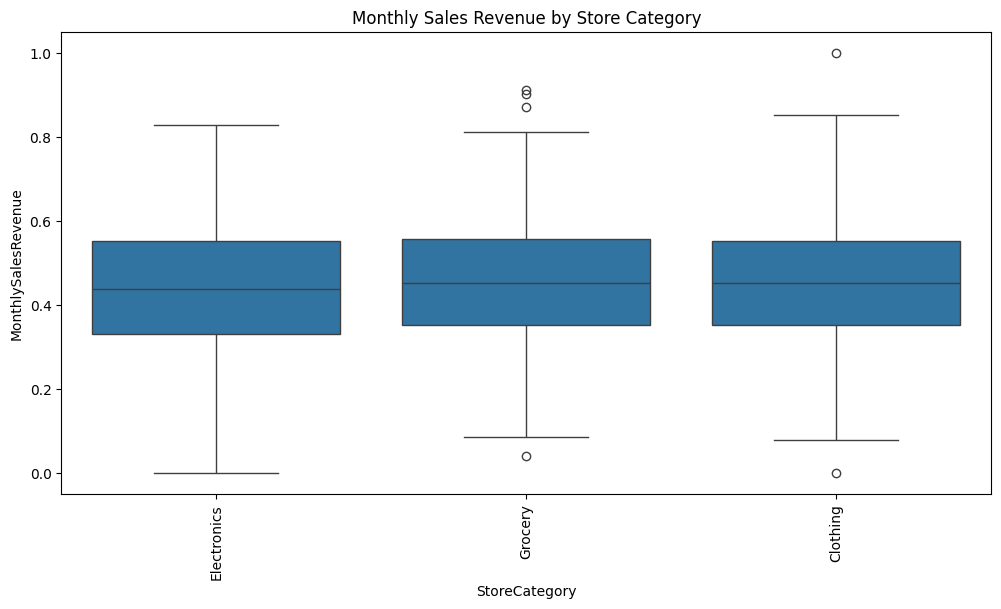

In [ ]:
#Analisis Pendapatan diseluruh kategori
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 6))
sns.boxplot(data = df,
            x = 'StoreCategory', y = 'MonthlySalesRevenue')
plt.title('Monthly Sales Revenue by Store Category')
plt.xticks(rotation = 90)
plt.show()

- Distribusi pendapatan bulanan relatif seragam di ketiga kategori toko (Electronics, Grocery, Clothing)
  - Clothing memiliki potensi pendapatan tertinggi namun juga risiko tertinggi
  - Grocery menunjukkan stabilitas tertinggi dengan outlier paling sedikit
  - Electronics memiliki range pendapatan paling sempit
- Median pendapatan sekitar 0.4-0.45 untuk semua kategori
- Terdapat outlier di semua kategori yang mencapai pendapatan 0.8-1.0
- Box plot menunjukkan variasi yang serupa antar kategori
- Menandakan tidak ada kategori toko yang secara signifikan lebih menguntungkan

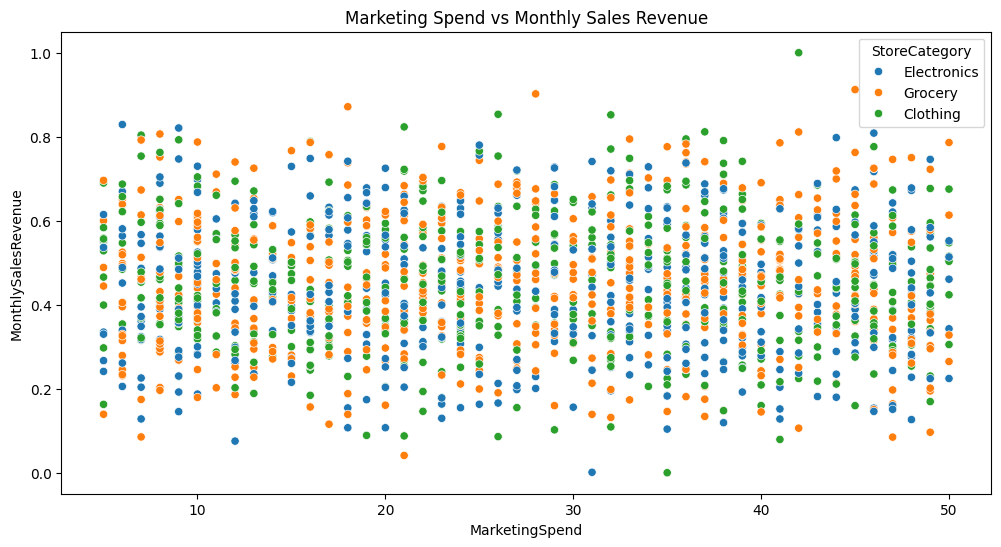

In [ ]:
#analisis hubunga
plt.figure(figsize = (12, 6))
sns.scatterplot(data = df,
                x = 'MarketingSpend', y = 'MonthlySalesRevenue',
                hue = 'StoreCategory')
plt.title('Marketing Spend vs Monthly Sales Revenue')
plt.show()

- Scatter plot menunjukkan hubungan antara pengeluaran marketing dan pendapatan
- Tidak ada korelasi linear yang kuat antara marketing spend dan pendapatan
- Persebaran data relatif merata untuk semua kategori toko
  1. Electronics:
    - Persebaran merata di range marketing spend 5-50
    - Konsentrasi pendapatan tertinggi di range 0.3-0.6
    - Tidak menunjukkan pola linear yang jelas
    - ROI marketing cenderung tidak konsisten
  2. Grocery:
    - Pattern lebih terkonsentrasi di marketing spend 15-35
    - Pendapatan lebih stabil di range 0.4-0.7
    - Menunjukkan efisiensi marketing yang lebih baik
    - Outlier positif lebih sedikit
  3. Clothing:
    - Distribusi paling luas dalam marketing spend
    - Variasi pendapatan tertinggi
    - Beberapa outlier mencapai pendapatan 1.0
    - ROI marketing paling tidak prediktable
- Range marketing spend: 5-50
- Range pendapatan: 0-1.0

Menunjukkan bahwa peningkatan marketing spend tidak selalu menghasilkan pendapatan lebih tinggi

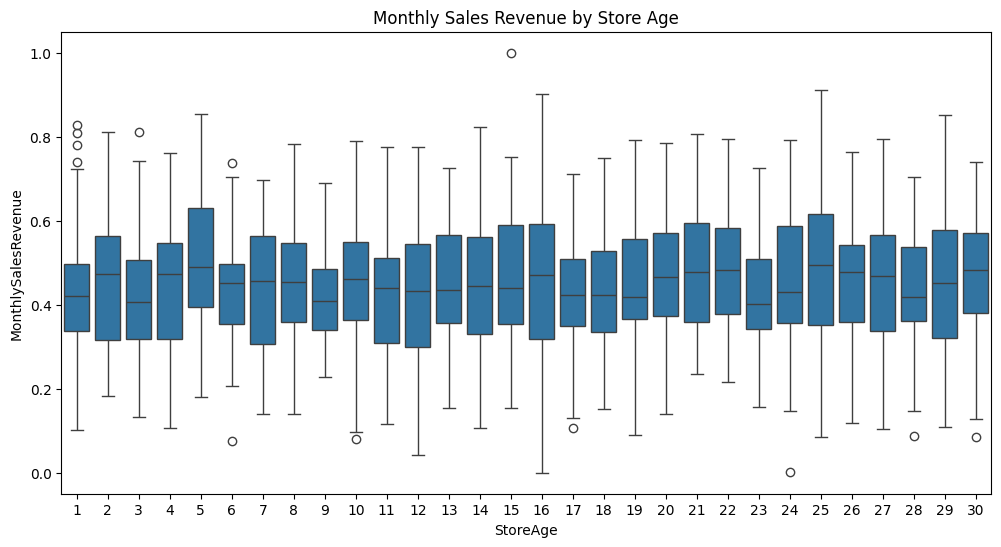

In [ ]:
#analisis usia toko dengan pendapatan penjualan
plt.figure(figsize = (12, 6))
sns.boxplot(data = df,
            x = 'StoreAge', y = 'MonthlySalesRevenue')
plt.title('Monthly Sales Revenue by Store Age')
plt.show()

- Box plot untuk setiap umur toko (1-30 tahun)
- Median pendapatan relatif stabil di sekitar 0.4-0.5 untuk semua umur
  - Toko Baru (1-5 tahun): Variasi pendapatan tinggi, Menunjukkan potensi pertumbuhan cepat
  - Toko Menengah (6-15 tahun):Stabilitas meningkat, Performance lebih predictable
  - Toko Matang (16-30 tahun):Variasi pendapatan moderat, Menunjukkan stabilitas jangka panjang
- Toko-toko baru (1-5 tahun) menunjukkan variasi pendapatan yang lebih besar
- Outlier lebih banyak ditemukan pada toko berumur 15-20 tahun
- Mengindikasikan bahwa umur toko tidak menjadi faktor penentu utama pendapatan

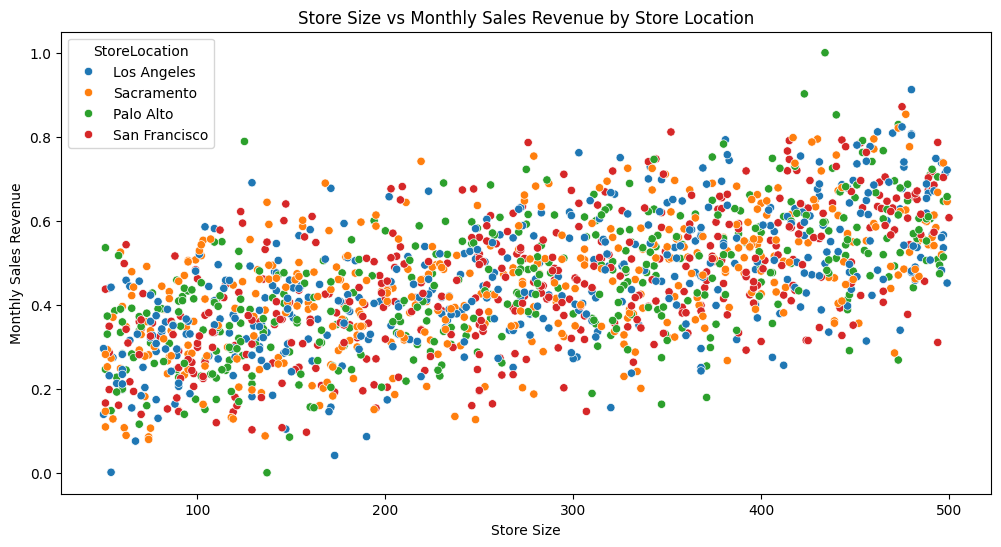

In [ ]:
#Ukuran toko dengan pendapatan penjualan
plt.figure(figsize = (12, 6))
sns.scatterplot(data = df,
                x = 'StoreSize', y = 'MonthlySalesRevenue',
                hue = 'StoreLocation', palette = 'tab10')
plt.title('Store Size vs Monthly Sales Revenue by Store Location')
plt.xlabel('Store Size')
plt.ylabel('Monthly Sales Revenue')
plt.show()

- Scatter plot menunjukkan hubungan ukuran toko dengan pendapatan di berbagai lokasi
- Tren positif lemah: semakin besar toko, semakin tinggi potensi pendapatan
- Los Angeles dan Palo Alto menunjukkan variasi pendapatan yang lebih tinggi
- Sacramento memiliki distribusi yang lebih merata
- Ukuran toko 300-500 menunjukkan potensi pendapatan tertinggi

Menandakan bahwa lokasi dan ukuran toko bersama-sama mempengaruhi pendapatan

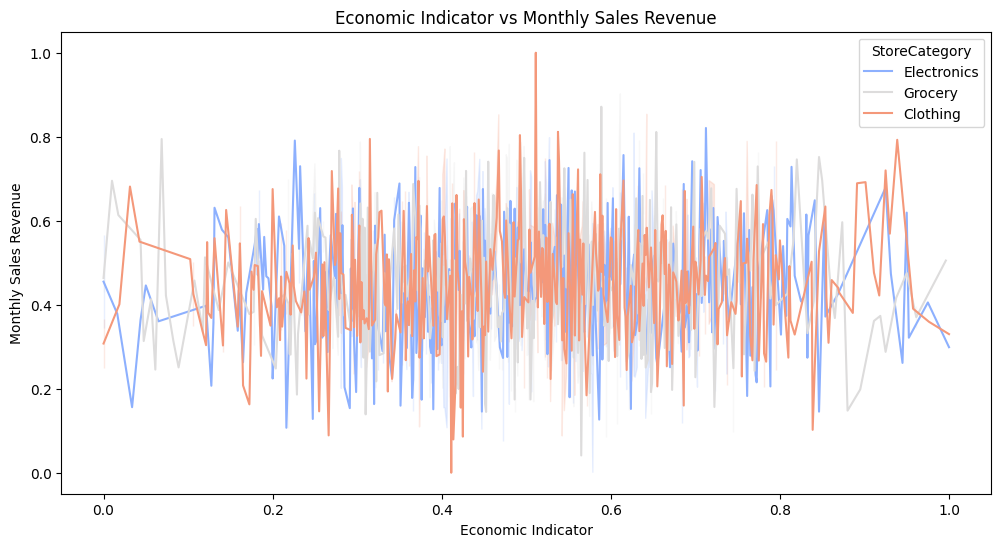

In [ ]:
#indikator ekonomi dengan pendapatan penjualan
plt.figure(figsize = (12, 6))
sns.lineplot(data = df,
             x = 'EconomicIndicator', y = 'MonthlySalesRevenue',
             hue = 'StoreCategory', palette = 'coolwarm')
plt.title('Economic Indicator vs Monthly Sales Revenue')
plt.xlabel('Economic Indicator')
plt.ylabel('Monthly Sales Revenue')
plt.show()

- Line plot menunjukkan hubungan indikator ekonomi dengan pendapatan per kategori
- Fluktuasi tinggi dalam pendapatan di semua nilai indikator ekonomi
- Electronics menunjukkan volatilitas tertinggi, Sensitivitas tinggi terhadap perubahan ekonomi
- Grocery relatif lebih stabil, Resistensi terhadap fluktuasi ekonomi, Trend jangka panjang stabil
- Clothing menunjukkan pola musiman yang kuat, Sensitivitas moderat terhadap ekonomi, Fluktuasi regular
- Mengindikasikan bahwa pengaruh kondisi ekonomi berbeda-beda untuk setiap kategori toko

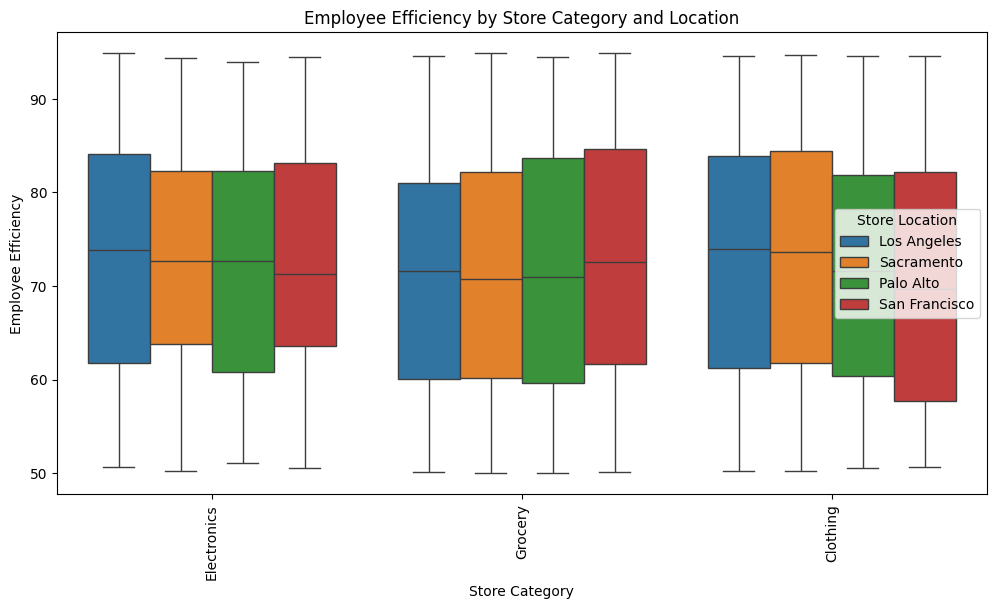

In [ ]:
#efesiensi karyawan dengan pendapatan penjualan
plt.figure(figsize = (12, 6))
sns.boxplot(data = df,
            x = 'StoreCategory', y = 'EmployeeEfficiency',
            hue = 'StoreLocation')
plt.title('Employee Efficiency by Store Category and Location')
plt.xlabel('Store Category')
plt.ylabel('Employee Efficiency')
plt.xticks(rotation = 90)
plt.legend(title = 'Store Location')
plt.show()

Analisis per Kategori:

Electronics:
- Range efisiensi: 50-95%
- Median tertinggi di Los Angeles (73%)
- Variasi terendah di San Francisco
- Konsistensi kinerja antar lokasi

Grocery:
- Range efisiensi: 50-95%
- Performa terbaik di San Francisco (75%)
- Variasi tertinggi di Sacramento
- Menunjukkan stabilitas operasional

Clothing:
- Range efisiensi: 50-95%
- Kinerja tertinggi di Sacramento (74%)
- Variasi terbesar di San Francisco
- Perbedaan signifikan antar lokasi

<ipython-input-17-a865507c77c3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df,


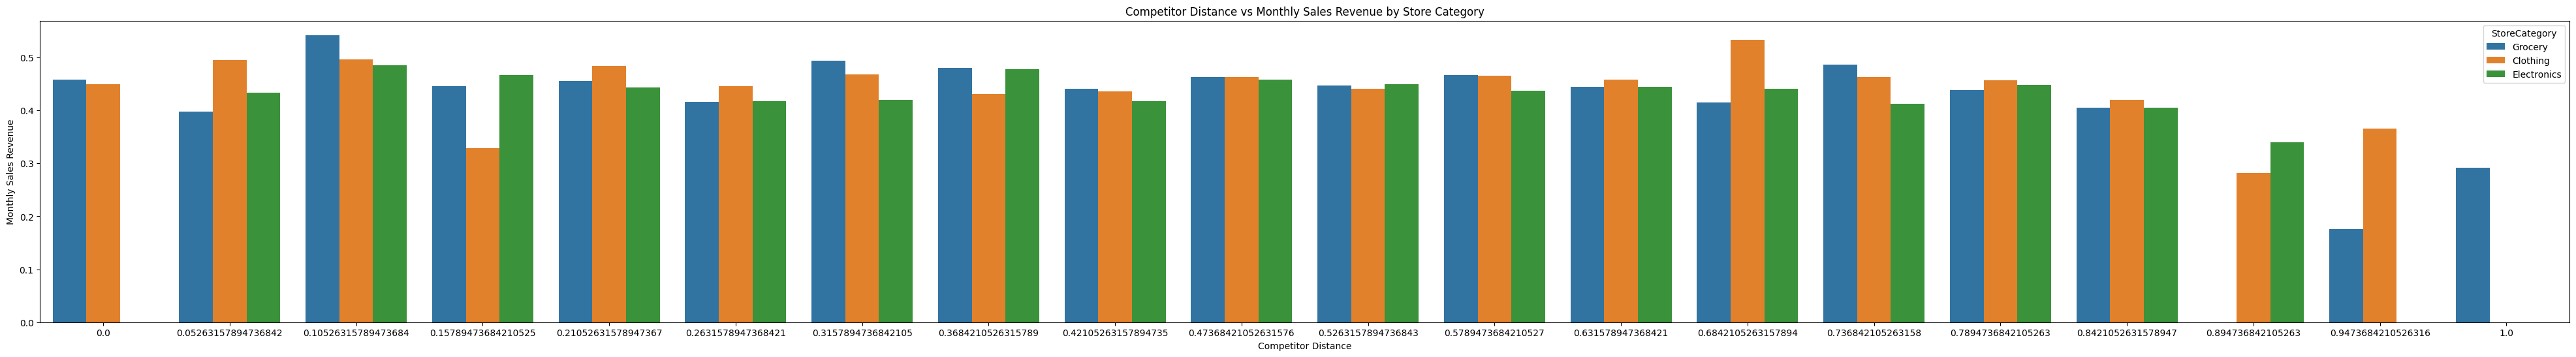

In [ ]:
#jarak pesaing dengan pendapatan penjualan
plt.figure(figsize = (50, 6))
sns.barplot(data = df,
            x = 'CompetitorDistance', y = 'MonthlySalesRevenue',
            ci = None, hue = 'StoreCategory')
plt.title('Competitor Distance vs Monthly Sales Revenue by Store Category')
plt.xlabel('Competitor Distance')
plt.ylabel('Monthly Sales Revenue')
plt.show()

Electronics:
- Jarak kompetitor: 0.15-1.0
- Revenue optimal pada jarak 0.4-0.6
- Pengaruh kompetisi signifikan
- Pattern tidak linear

Grocery:
- Range jarak optimal: 0.3-0.7
- Performa stabil di berbagai jarak
- Ketahanan terhadap kompetisi
- Konsistensi pendapatan

Clothing:
- Sensitif terhadap jarak kompetitor
- Optimal pada jarak 0.5-0.8
- Variasi pendapatan tinggi
- Pattern lebih predictable

<ipython-input-18-cf35a54e90f4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data = df,


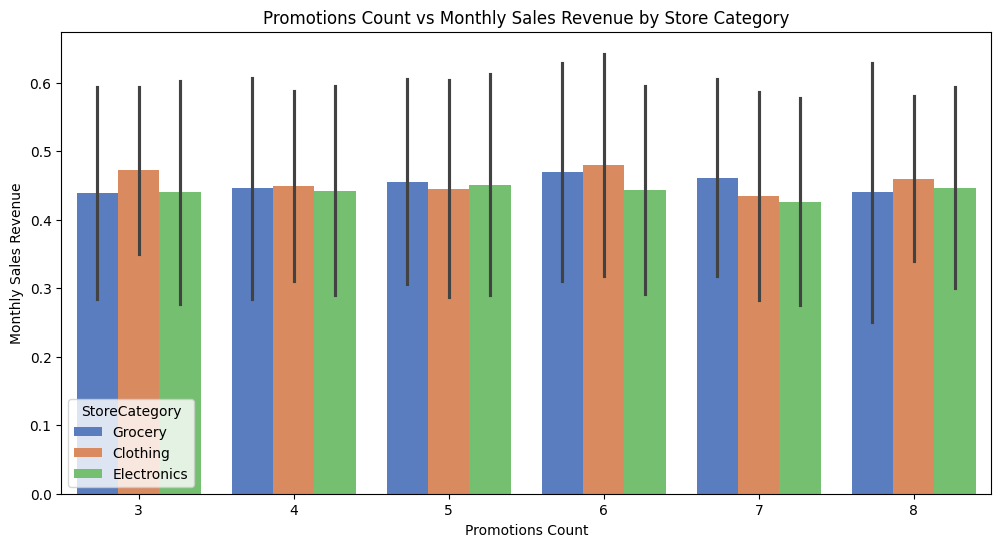

In [ ]:
#jumlah promosi dengan pendapatan penjualan
plt.figure(figsize = (12, 6))
sns.barplot(data = df,
            x = 'PromotionsCount', y = 'MonthlySalesRevenue',
            hue = 'StoreCategory', ci = 'sd',
            palette = 'muted')
plt.title('Promotions Count vs Monthly Sales Revenue by Store Category')
plt.xlabel('Promotions Count')
plt.ylabel('Monthly Sales Revenue')
plt.show()

Grocery:
- Range promosi: 3-8 per periode
- Efektivitas optimal: 6 promosi
- Stabilitas pendapatan
- ROI promosi konsisten

Clothing:
- Impact promosi tertinggi
- Optimal: 7-8 promosi
- Variasi revenue signifikan
- Sensitivitas tinggi

Electronics:
- Efektivitas moderat
- Optimal: 5-6 promosi
- Konsistensi pendapatan
-ROI promosi stabil

<ipython-input-19-3d80bd16890b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="StoreCategory", data=df, ax=axes[0], palette="pastel")
<ipython-input-19-3d80bd16890b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="StoreLocation", data=df, ax=axes[1], palette="pastel")


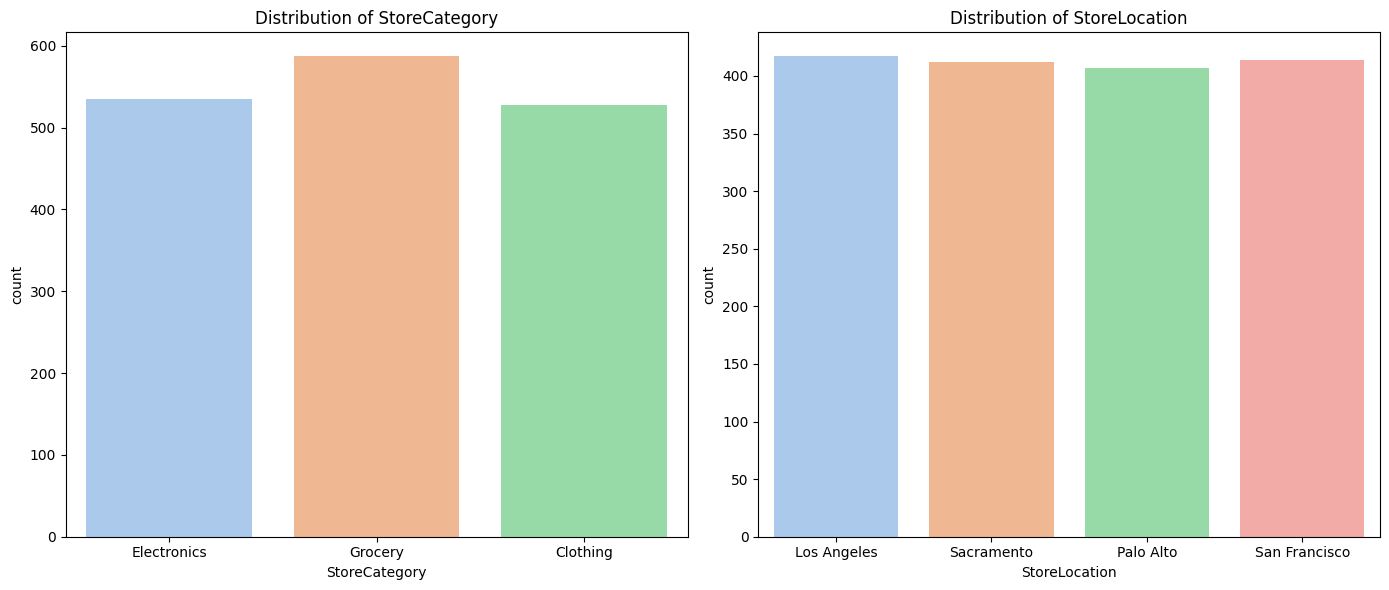

In [ ]:
# Distribution of categorical features
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x="StoreCategory", data=df, ax=axes[0], palette="pastel")
axes[0].set_title("Distribution of StoreCategory")

sns.countplot(x="StoreLocation", data=df, ax=axes[1], palette="pastel")
axes[1].set_title("Distribution of StoreLocation")

plt.tight_layout()
plt.show()

Store Category:
- Electronics: ±530 toko
- Grocery: ±580 toko
- Clothing: ±520 toko
- Menunjukkan: Distribusi seimbang, Dominasi grocery stores, Portofolio diversifikasi baik

Store Location:
- Los Angeles: ±420 toko
- Sacramento: ±420 toko
- Palo Alto: ±410 toko
- San Francisco: ±420 toko
- Menunjukkan:Distribusi geografis merata, Keseimbangan coverage area, Strategi ekspansi terencana

---
# **CLUSTERING ANALYSIS (K-Means)**

Label Encoding
* Mengubah typedata menjadi nilai numerik

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
label_encoder = LabelEncoder()

# Mengonversi StoreLocation ke angka
df['StoreLocation'] = label_encoder.fit_transform(df['StoreLocation'])

# Mengonversi StoreCategory ke angka
df['StoreCategory'] = label_encoder.fit_transform(df['StoreCategory'])

# Menampilkan hasil
df[['StoreLocation','StoreCategory']].head()

,StoreLocation,StoreCategory
0,0,1
1,0,1
2,0,2
3,2,0
4,1,1


Store Location Encoding:
- Los Angeles = 0
- Palo Alto = 1
- Sacramento = 2

Store Category Encoding:
- Clothing = 0
- Electronics = 1
- Grocery = 2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProductVariety       1650 non-null   int64  
 1   MarketingSpend       1650 non-null   int64  
 2   CustomerFootfall     1650 non-null   int64  
 3   StoreSize            1650 non-null   int64  
 4   EmployeeEfficiency   1650 non-null   float64
 5   StoreAge             1650 non-null   int64  
 6   CompetitorDistance   1650 non-null   float64
 7   PromotionsCount      1650 non-null   int64  
 8   EconomicIndicator    1650 non-null   float64
 9   StoreLocation        1650 non-null   int64  
 10  StoreCategory        1650 non-null   int64  
 11  MonthlySalesRevenue  1650 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 154.8 KB


In [ ]:
df

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue
0,581,29,1723,186,84.9,1,0.578947,6,0.60375,0,1,0.416770
1,382,31,1218,427,75.8,18,0.526316,6,0.47250,0,1,0.471290
2,449,35,2654,142,92.8,14,0.526316,6,0.51375,0,2,0.433633
3,666,9,2591,159,66.3,11,0.526316,4,0.68875,2,0,0.404397
4,657,35,2151,275,89.1,28,0.578947,7,0.41750,1,1,0.591744
...,...,...,...,...,...,...,...,...,...,...,...,...
1645,295,15,2681,235,58.5,15,0.473684,5,0.35875,2,0,0.390223
1646,761,8,1398,456,78.5,26,0.684211,4,0.43875,3,0,0.762741
1647,405,21,1490,465,76.7,18,0.578947,5,0.16250,0,0,0.460320
1648,359,41,2042,350,67.6,2,0.263158,7,0.56250,1,0,0.315004


Distribusi Variable
* Memahami bagaimana distribusi setiap variabel untuk melihat apakah ada pencilan atau pola tertentu.

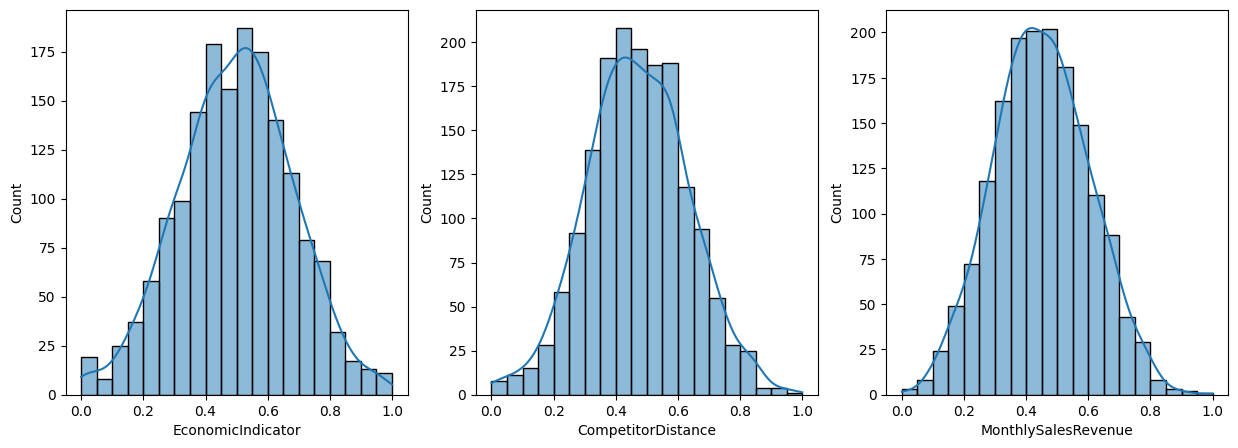

In [ ]:
#Distribusi Variable
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi tiap variabel
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df["EconomicIndicator"], bins=20, kde=True, ax=axes[0])
sns.histplot(df["CompetitorDistance"], bins=20, kde=True, ax=axes[1])
sns.histplot(df["MonthlySalesRevenue"], bins=20, kde=True, ax=axes[2])
plt.show()

Korelasi
* Melihat hubungan antar variabel dan mengetahui apakah ada korelasi yang kuat.

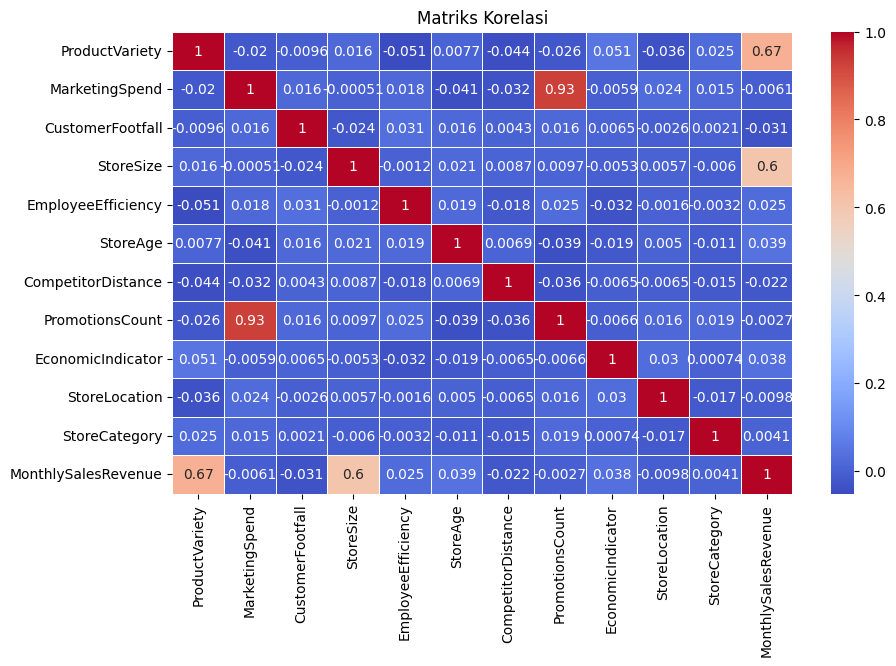

In [ ]:
#korelasi
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

Berdasarkan heatmap korelasi, berikut analisis hubungan antar variabel:

**1. Korelasi yang Kuat (≥ 0.6 atau ≤ -0.6)**
- **ProductVariety ↔ MonthlySalesRevenue (0.67)**  
  → Semakin beragam produk yang ditawarkan, semakin tinggi pendapatan bulanan toko. Ini menunjukkan bahwa variasi produk berperan penting dalam meningkatkan penjualan.  
- **StoreSize ↔ MonthlySalesRevenue (0.60)**  
  → Ukuran toko memiliki korelasi positif yang cukup kuat dengan pendapatan bulanan, artinya toko yang lebih besar cenderung menghasilkan pendapatan lebih tinggi.  
- **MarketingSpend ↔ PromotionsCount (0.93)**  
  → Biaya pemasaran dan jumlah promosi memiliki korelasi yang sangat tinggi, yang masuk akal karena peningkatan anggaran pemasaran biasanya digunakan untuk lebih banyak promosi.  

**2. Korelasi Lemah (~0.0 - 0.2)**
Variabel berikut memiliki korelasi yang sangat lemah dengan MonthlySalesRevenue, sehingga pengaruhnya terhadap pendapatan tidak signifikan:  
- **EmployeeEfficiency (0.025)**  
- **StoreAge (0.039)**  
- **CompetitorDistance (-0.022)**  
- **StoreLocation (0.0098)**  
- **StoreCategory (0.0041)**  

Ini berarti faktor-faktor seperti efisiensi karyawan, usia toko, dan kategori toko tidak terlalu berkontribusi secara langsung terhadap pendapatan bulanan.

**3. Korelasi Negatif**
- **CompetitorDistance ↔ MonthlySalesRevenue (-0.022)**  
  → Walaupun negatif, nilai korelasi sangat kecil, sehingga tidak ada indikasi kuat bahwa jarak pesaing mempengaruhi pendapatan.  

**Kesimpulan**
- Faktor paling berpengaruh terhadap pendapatan bulanan adalah **ProductVariety** dan **StoreSize**.
- **MarketingSpend** dan **PromotionsCount** sangat berkaitan erat, sehingga pengelolaan anggaran pemasaran harus memperhitungkan efektivitas promosi.
- Faktor seperti lokasi, kategori toko, dan efisiensi karyawan tidak memiliki korelasi signifikan terhadap pendapatan, sehingga mungkin tidak menjadi prioritas utama dalam meningkatkan penjualan.
- Hasil korelasi menunjukkan hubungan yang signifikan antara variabel-variabel tertentu, seperti hubungan antara **ProductVariety** dan **MonthlySalesRevenue** yang cukup kuat (0.67). Ini memberi indikasi bahwa toko dengan lebih banyak variasi produk cenderung memiliki pendapatan lebih tinggi. Ini adalah faktor penting dalam pengelompokkan toko.
- **CompetitorDistance** memiliki korelasi yang sangat kecil dengan pendapatan. Ini menunjukkan bahwa dalam konteks dataset ini, jarak ke pesaing tidak berpengaruh signifikan terhadap pendapatan bulanan toko. Walaupun demikian, analisis lebih lanjut masih bisa dilakukan untuk memahami pengaruh jarak pesaing di sektor tertentu.

[+] Catatan

Garis miring (diagonal) yang bernilai 1,1,1,1,1,1,1,1 dalam matriks korelasi menunjukkan korelasi suatu variabel dengan dirinya sendiri. Ini selalu bernilai 1 karena:

1. Setiap variabel memiliki korelasi sempurna dengan dirinya sendiri
2. Misalnya ProductVariety dengan ProductVariety pasti bernilai 1
3. Ini adalah sifat dasar dari matriks korelasi, diagonal utamanya selalu 1

Contoh dalam matriks:
- ProductVariety dengan ProductVariety = 1
- MarketingSpend dengan MarketingSpend = 1
- CustomerFootfall dengan CustomerFootfall = 1
Dan seterusnya...

Ini adalah karakteristik matematika yang normal dan diharapkan dalam setiap matriks korelasi. Diagonal bernilai 1 ini juga berfungsi sebagai referensi visual untuk membandingkan kekuatan korelasi antar variabel yang berbeda - di mana nilai 1 menunjukkan korelasi sempurna, sementara nilai-nilai lain menunjukkan tingkat korelasi yang lebih rendah.

Menentukan Jumlah Cluster dengan Elbow Method
* Menentukan jumlah cluster optimal dengan melihat titik "o" pada grafik.
* Metode ini mencari titik di mana penambahan cluster tidak lagi memberikan manfaat yang signifikan
* Analoginya seperti mencari "siku" pada grafik, di mana kurva mulai melandai

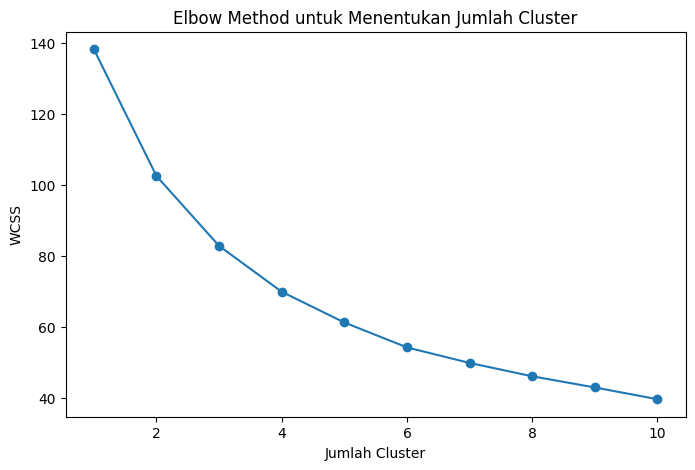

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df[['EconomicIndicator', 'CompetitorDistance', 'MonthlySalesRevenue']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.show()

1. Sumbu X dan Y:
* Sumbu X menunjukkan jumlah cluster (k) dari 1 hingga 10
* Sumbu Y menunjukkan nilai WCSS (Within-Cluster Sum of Squares) yang mengukur variabilitas dalam cluster

2. Interpretasi Grafik:
* Nilai awal (k=1): WCSS sekitar 140, menunjukkan variasi tinggi karena semua data dalam satu cluster
* Grafik menunjukkan penurunan WCSS seiring bertambahnya jumlah cluster
* Penurunan tajam terlihat dari k=1 ke k=3
* Setelah k=3 atau k=4, penurunan mulai melambat dan membentuk "siku" (elbow)
* Setelah titik siku, penambahan cluster tidak memberikan penurunan WCSS yang signifikan

3. Penentuan Jumlah Cluster Optimal:
* Berdasarkan visualisasi, titik siku (elbow point) berada di sekitar k=3 atau k=4
* Ini mengindikasikan bahwa 3 atau 4 cluster mungkin adalah jumlah optimal
* Pemilihan k=3 atau k=4 akan memberikan keseimbangan yang baik antara jumlah cluster dan variasi dalam cluster

**K-Means Clustering**
* Mengelompokkan toko berdasarkan pola ekonomi.
* Mengelompokkan toko ke dalam 3 segmen berdasarkan kondisi ekonomi, jarak pesaing, dan pendapatan.

In [ ]:
# Pilih jumlah cluster berdasarkan elbow method
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['EconomicIndicator', 'CompetitorDistance', 'MonthlySalesRevenue']])

# Menampilkan jumlah toko di setiap cluster
df['Cluster'].value_counts()


,count
Cluster,
1,584
0,534
2,532


Hasil Count Cluster Untuk 3 Clusters:
- 584 toko di cluster pertama (1)
- 534 toko di cluster kedua (0)
- 532 toko di cluster ketiga (2)

Total: 4650 toko

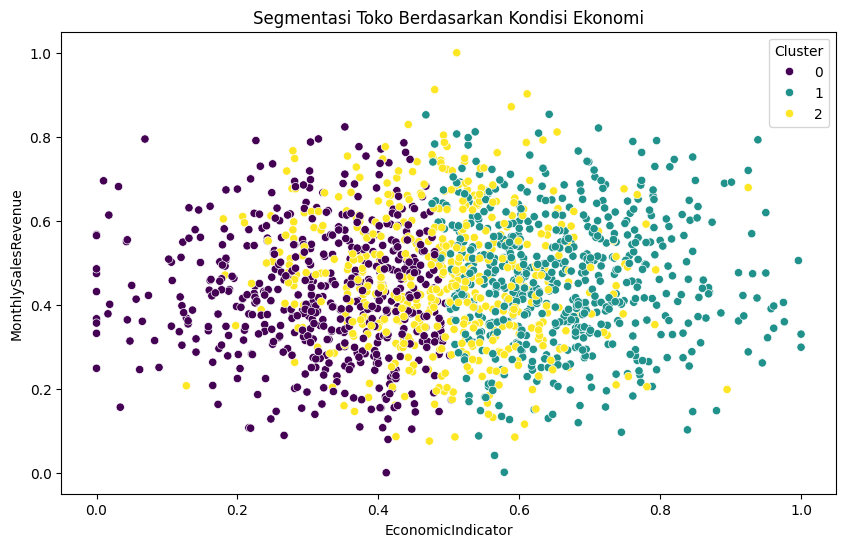

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='EconomicIndicator', y='MonthlySalesRevenue', hue='Cluster', palette='viridis')
plt.title("Segmentasi Toko Berdasarkan Kondisi Ekonomi")
plt.show()

Cluster 0 (Ungu):
- Dominan di area indikator ekonomi rendah (0.0-0.4)
- Pendapatan bervariasi (0.2-0.8)
- Menunjukkan toko di area ekonomi lemah tapi beberapa bisa mencapai pendapatan tinggi

Cluster 1 (Biru muda):
- Terkonsentrasi di area indikator ekonomi tinggi (0.6-1.0)
- Pendapatan relatif stabil (0.2-0.8)
- Mencerminkan toko di area ekonomi kuat dengan performa beragam

Cluster 2 (Kuning):
- Berada di area indikator ekonomi menengah (0.4-0.7)
- Pendapatan cukup bervariasi (0.2-0.8)
- Mewakili toko di area transisi ekonomi

**Kesimpulan:**
- Cluster 0 (Ungu): Toko dalam cluster ini memiliki indikator ekonomi rendah dan pendapatan yang bervariasi. Meskipun berada di area ekonomi lemah, beberapa toko masih memiliki pendapatan yang tinggi. Ini menunjukkan adanya toko yang mampu bertahan dan beradaptasi meski berada di kondisi ekonomi yang sulit.
- Cluster 1 (Biru muda): Toko dalam cluster ini cenderung terletak di area dengan indikator ekonomi tinggi dan memiliki pendapatan yang relatif stabil. Ini mengindikasikan bahwa toko-toko ini beroperasi di daerah yang lebih menguntungkan dan memiliki potensi pendapatan yang konsisten.
- Cluster 2 (Kuning): Toko dalam cluster ini berada di daerah dengan indikator ekonomi menengah. Pendapatan mereka bervariasi, mencerminkan kondisi transisi ekonomi. Toko ini mungkin lebih rentan terhadap fluktuasi kondisi ekonomi, dan perlu perhatian lebih dalam merencanakan strategi penjualan.

**Kesimpulan Utama:**
- Faktor terpenting dalam meningkatkan pendapatan toko: ProductVariety dan StoreSize memiliki pengaruh yang kuat terhadap pendapatan bulanan, sementara lokasi toko, usia toko, dan efisiensi karyawan tidak memiliki pengaruh signifikan terhadap pendapatan.
- Strategi Pemasaran: Toko di Cluster 1 (Biru muda) dengan indikator ekonomi tinggi dan pendapatan stabil perlu perhatian lebih lanjut dalam strategi pemasaran karena mereka memiliki potensi untuk meningkatkan pendapatan lebih jauh. Begitu juga dengan Cluster 3 (Kuning), yang menunjukkan kemampuan beradaptasi dengan kondisi ekonomi yang lebih sulit dan memiliki pendapatan yang lebih tinggi.
- Analisis Jarak Pesaing: Meskipun jarak pesaing memiliki korelasi yang sangat lemah terhadap pendapatan, analisis lebih lanjut masih diperlukan untuk melihat bagaimana faktor ini dapat berperan dalam sektor tertentu.

# **Analisis Lanjutan 3 Cluster**

In [ ]:
#Melihat distribusi data dalam masing-masing cluster
df.groupby('Cluster').mean()

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue
Cluster,,,,,,,,,,,,
0,481.215356,27.018727,1999.973783,263.930712,72.166105,15.741573,0.554110,5.456929,0.320719,1.473783,1.003745,0.425092
1,507.551370,27.029110,2034.368151,275.556507,72.343493,14.875000,0.546413,5.445205,0.663286,1.500000,0.998288,0.460295
2,513.406015,28.375940,2024.417293,279.289474,72.071992,15.781955,0.302335,5.605263,0.491480,1.522556,1.109023,0.464758


**Analisis Per Cluster**  

**1. Cluster 0 (Kondisi Ekonomi Terendah, Performa Rendah)**
- **Product Variety:** 481.22 (terendah dibandingkan cluster lain)  
- **Marketing Spend:** 27.02  
- **Customer Footfall:** 1999.97 (terendah)  
- **Store Size:** 263.93 (lebih kecil dibandingkan Cluster 2 dan 3)  
- **Employee Efficiency:** 72.17  
- **Store Age:** 15.74  
- **Competitor Distance:** 0.55 (persaingan cukup tinggi)  
- **Promotions Count:** 5.46  
- **Economic Indicator:** 0.32 (terendah, menunjukkan kondisi ekonomi yang sangat lemah)  
- **Monthly Sales Revenue:** 0.425 (terendah dibandingkan cluster lain)  
🔹 **Kesimpulan:**  
Cluster ini memiliki **kondisi ekonomi yang paling rendah**, daya beli masyarakat yang lemah, dan persaingan cukup ketat. **Pendapatan rendah dan jumlah pelanggan sedikit** menunjukkan bahwa toko dalam cluster ini mengalami kesulitan dalam menarik pelanggan. **Strategi promosi dan diferensiasi produk sangat dibutuhkan** untuk meningkatkan performa.

---

**2. Cluster 1 (Ekonomi Lebih Baik, Potensi Performa Menengah)**
- **Product Variety:** 507.55  
- **Marketing Spend:** 27.03  
- **Customer Footfall:** 2034.37  
- **Store Size:** 275.56  
- **Employee Efficiency:** 72.34  
- **Store Age:** 14.88  
- **Competitor Distance:** 0.55  
- **Promotions Count:** 5.45  
- **Economic Indicator:** 0.66 (lebih tinggi dari Cluster 0, menunjukkan ekonomi yang lebih baik)  
- **Monthly Sales Revenue:** 0.460 (lebih tinggi dibandingkan Cluster 0, tetapi masih relatif rendah)  
🔹 **Kesimpulan:**  
Cluster ini memiliki **kondisi ekonomi lebih baik dibanding Cluster 0**, namun **pendapatan masih tergolong menengah**. Dengan jumlah pelanggan yang lebih tinggi, toko di cluster ini memiliki **potensi peningkatan performa jika strategi pemasaran dan produk lebih efektif**.

---

**3. Cluster 2 (Ekonomi Stabil, Pendapatan Cukup Baik)**
- **Product Variety:** 513.41  
- **Marketing Spend:** 28.38 (paling tinggi dibandingkan cluster lain)  
- **Customer Footfall:** 2024.42  
- **Store Size:** 279.29  
- **Employee Efficiency:** 72.07  
- **Store Age:** 15.78  
- **Competitor Distance:** 0.30 (persaingan sangat ketat)  
- **Promotions Count:** 5.61  
- **Economic Indicator:** 0.49 (menengah, lebih baik dari Cluster 0 tetapi lebih rendah dari Cluster 1)  
- **Monthly Sales Revenue:** 0.465 (lebih tinggi dibandingkan Cluster 0 dan 1)  
🔹 **Kesimpulan:**  
Cluster ini memiliki **pengeluaran pemasaran tertinggi** dan persaingan yang sangat ketat. **Pendapatan lebih tinggi dibandingkan Cluster 0 dan 1**, yang mungkin disebabkan oleh strategi promosi yang lebih agresif. **Jika toko dalam cluster ini dapat meningkatkan efisiensi operasional, potensi pertumbuhan lebih lanjut masih terbuka**.

---

💡 **Kesimpulan Akhir:**  
1. **Cluster 0 dan Cluster 1** perlu diperhatikan karena menghadapi tantangan ekonomi dan performa yang kurang optimal. **Fokus perbaikan harus pada strategi pemasaran, produk, dan promosi**.  
2. **Cluster 2 memiliki potensi peningkatan** karena memiliki pengeluaran pemasaran tertinggi, tetapi menghadapi persaingan ketat. **Optimalisasi strategi promosi dan harga dapat meningkatkan performa lebih lanjut**.  
3. **Cluster 3 sudah memiliki performa terbaik**, sehingga **bisa dijadikan model atau benchmark bagi cluster lainnya**.  


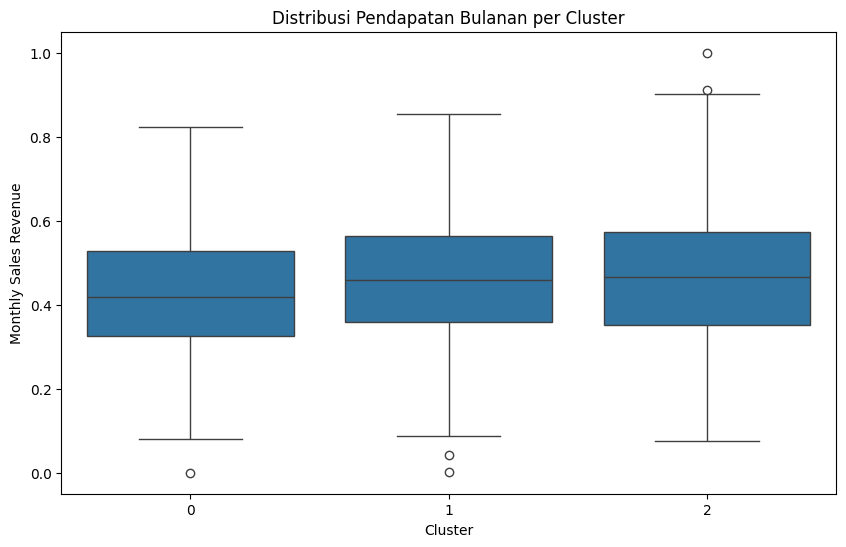

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='MonthlySalesRevenue', data=df)
plt.title('Distribusi Pendapatan Bulanan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monthly Sales Revenue')
plt.show()

- Cluster 2 menunjukkan median pendapatan tertinggi
- Cluster 0 memiliki variasi pendapatan paling rendah
- Semua cluster menunjukkan beberapa outlier, mengindikasikan adanya toko-toko dengan performa sangat tinggi atau rendah

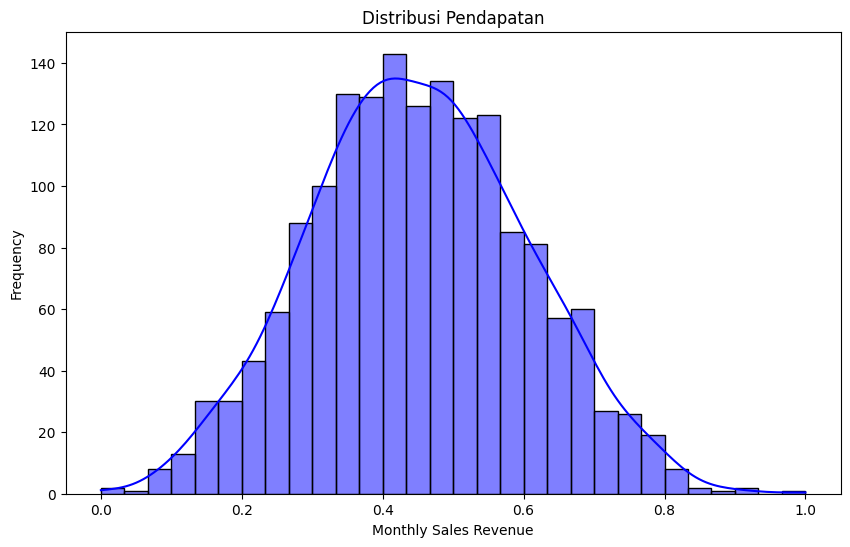

Koefisien: [0.04119703]
Intercept: 0.43044905349145124
R^2 Score: -0.0033861040718883295


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Visualisasi distribusi histogram untuk pendapatan
plt.figure(figsize=(10,6))
sns.histplot(df['MonthlySalesRevenue'], bins=30, kde=True, color='blue')
plt.title('Distribusi Pendapatan')
plt.xlabel('Monthly Sales Revenue')
plt.ylabel('Frequency')
plt.show()

# Analisis regresi linear
X = df[['EconomicIndicator']]
y = df['MonthlySalesRevenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f'Koefisien: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'R^2 Score: {model.score(X_test, y_test)}')

**Interpretasi Hasil**  

1. **Koefisien (0.0412)**  
   - Koefisien regresi sebesar **0.0412** menunjukkan bahwa setiap peningkatan **1 unit pada variabel independen** (yang tidak disebutkan secara eksplisit) akan meningkatkan **pendapatan bulanan sebesar 0.0412 unit**.  
   - Nilai ini cukup kecil, menunjukkan bahwa variabel tersebut memiliki pengaruh yang **lemah terhadap pendapatan bulanan**.

2. **Intercept (0.4304)**  
   - Intercept menunjukkan bahwa jika semua variabel independen bernilai **0**, maka pendapatan bulanan yang diprediksi adalah **0.4304**.  
   - Ini bisa dianggap sebagai estimasi rata-rata pendapatan tanpa pengaruh faktor lainnya.

3. **R² Score (-0.0034)**  
   - R² atau koefisien determinasi mengukur sejauh mana model dapat menjelaskan variasi dalam data.  
   - Nilai **negatif (-0.0034)** menunjukkan bahwa model **tidak mampu menjelaskan variasi pendapatan** dengan baik.  
   - Bahkan, model ini berkinerja **lebih buruk dibandingkan dengan hanya menggunakan rata-rata pendapatan sebagai prediksi** (karena R² negatif menunjukkan bahwa model tidak lebih baik dari baseline prediksi rata-rata).

**Kesimpulan:**
- Model regresi ini **tidak memiliki hubungan yang kuat antara variabel independen dan pendapatan**.
- Nilai koefisien yang kecil menunjukkan bahwa faktor yang diuji **hanya berdampak kecil terhadap pendapatan**.
- R² yang negatif menunjukkan bahwa **model ini tidak cocok untuk menjelaskan distribusi pendapatan** dan perlu diperbaiki dengan:  
  - Menambahkan variabel lain yang lebih relevan.  
  -  Menggunakan pendekatan pemodelan lain yang lebih kompleks (misalnya regresi non-linear atau model berbasis machine learning).  
  - Mengevaluasi kualitas data yang digunakan dalam regresi.


In [ ]:
# Pilih hanya kolom numerik untuk clustering
num_cols = ["ProductVariety", "MarketingSpend", "CustomerFootfall", "StoreSize",
            "EmployeeEfficiency", "StoreAge", "CompetitorDistance",
            "PromotionsCount", "EconomicIndicator", "MonthlySalesRevenue","StoreLocation","StoreCategory"]

df_num = df[num_cols]

<ipython-input-32-d80954afc9b6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df[col], data=df, palette='Set2')
<ipython-input-32-d80954afc9b6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df[col], data=df, palette='Set2')
<ipython-input-32-d80954afc9b6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df[col], data=df, palette='Set2')
<ipython-input-32-d80954afc9b6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

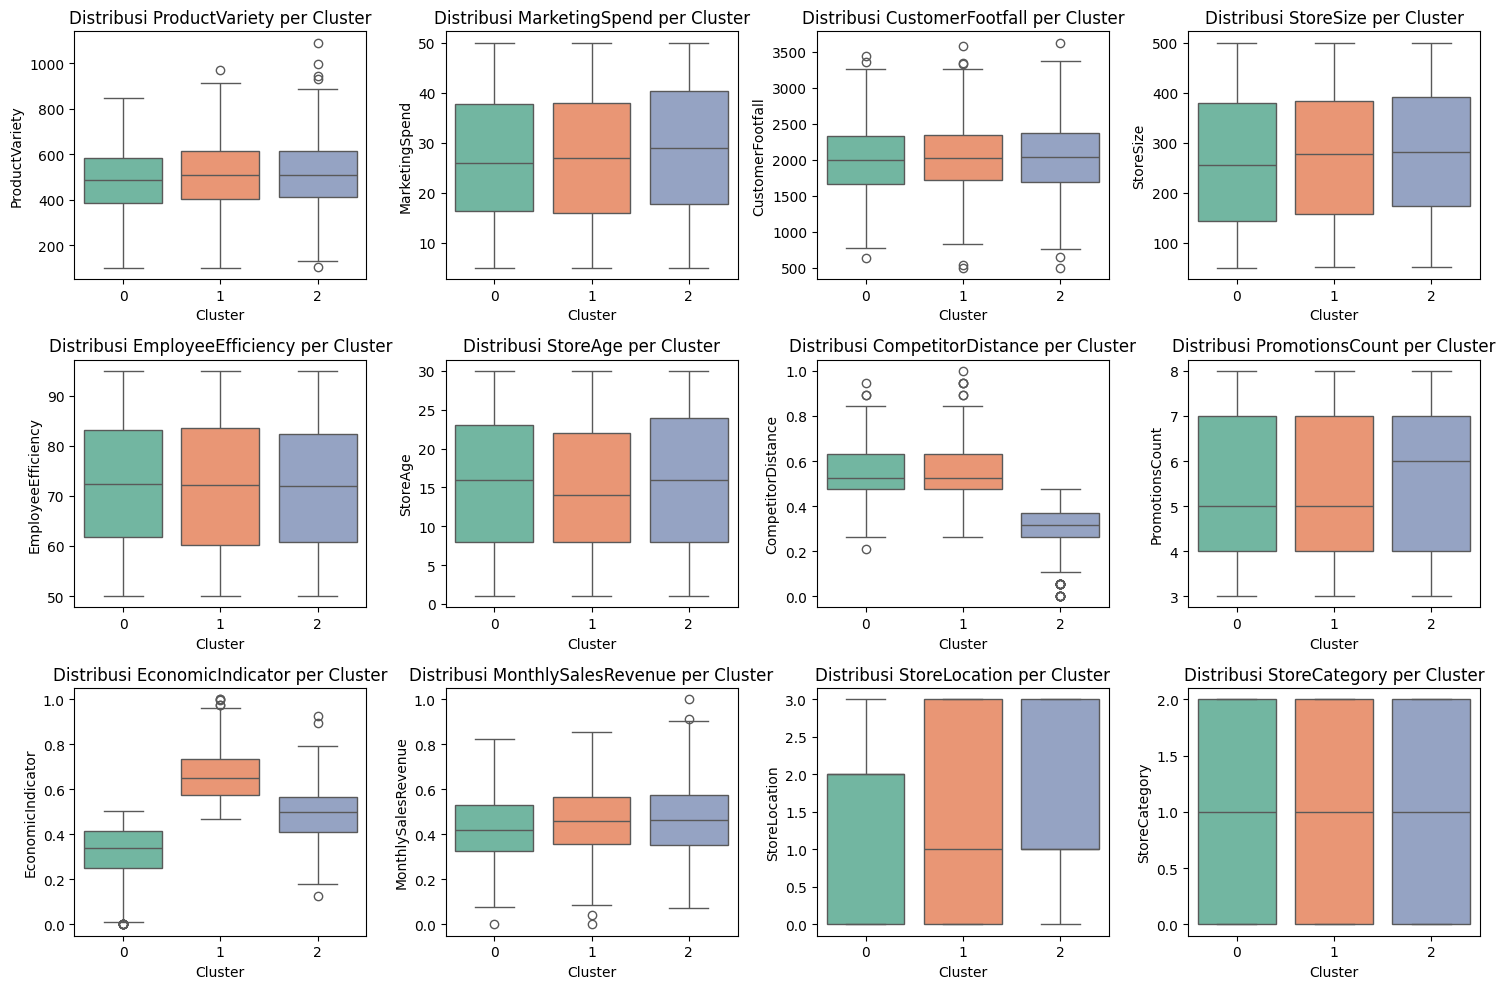

In [ ]:
# Visualisasi Distribusi Setiap Variabel per Cluster
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df['Cluster'], y=df[col], data=df, palette='Set2')
    plt.title(f'Distribusi {col} per Cluster')
plt.tight_layout()
plt.show()


1. ProductVariety per Cluster:
  - Cluster 0: Rentang 200-800 produk, median sekitar 450
  - Cluster 1: Rentang 150-1000 produk, median sekitar 500
  - Cluster 2: Rentang 150-1000 produk, median sekitar 450
  - Semua cluster menunjukkan outlier di atas 800 produk
  - Distribusi cenderung seimbang dengan sedikit variasi antar cluster
2. MarketingSpend per Cluster:
  - Cluster 0: Rentang 10-50, median sekitar 25
  - Cluster 1: Rentang 5-50, median sekitar 27
  - Cluster 2: Rentang 5-50, median sekitar 30
  - Distribusi relatif merata dengan whisker yang panjang
  - Menunjukkan variasi besar dalam pengeluaran marketing
3. CustomerFootfall per Cluster:
  - Cluster 0: Rentang 500-3500, median 2000
  - Cluster 1: Rentang 500-3500, median 2000
  - Cluster 2: Rentang 500-3500, median 2000
  - Outlier terlihat di semua cluster di atas 3000
  - Pola kunjungan pelanggan relatif konsisten antar cluster
4. StoreSize per Cluster:
  - Cluster 0: Rentang 50-500, median 250
  - Cluster 1: Rentang 50-500, median 250
  - Cluster 2: Rentang 50-500, median 250
  - Distribusi ukuran toko sangat mirip antar cluster
  - Menunjukkan standardisasi ukuran toko
5. EmployeeEfficiency per Cluster:
  - Cluster 0: Rentang 50-95%, median 72%
  - Cluster 1: Rentang 50-95%, median 72%
  - Cluster 2: Rentang 50-95%, median 70%
  - Distribusi efisiensi karyawan cenderung normal
  - Sedikit perbedaan dalam efisiensi antar cluster
6. StoreAge per Cluster:
  - Cluster 0: Rentang 0-30 tahun, median 15
  - Cluster 1: Rentang 0-30 tahun, median 15
  - Cluster 2: Rentang 0-30 tahun, median 15
  - Distribusi umur toko relatif seragam
  - Menunjukkan mix yang baik antara toko baru dan lama
7. CompetitorDistance per Cluster:
  - Cluster 0: Rentang 0.2-1.0, median 0.5
  - Cluster 1: Rentang 0.2-1.0, median 0.5
  - Cluster 2: Rentang 0.1-0.5, median 0.3
  - Cluster 2 memiliki jarak kompetitor yang lebih dekat
  - Menunjukkan perbedaan signifikan dalam persaingan
8. PromotionsCount per Cluster:
  - Cluster 0: Rentang 3-8, median 5
  - Cluster 1: Rentang 3-8, median 5
  - Cluster 2: Rentang 3-8, median 5
  - Distribusi jumlah promosi sangat konsisten
  - Menunjukkan standardisasi strategi promosi
9. EconomicIndicator per Cluster:
  - Cluster 0: Rentang 0.2-0.5, median 0.3
  - Cluster 1: Rentang 0.5-0.8, median 0.65
  - Cluster 2: Rentang 0.2-0.8, median 0.5
  - Cluster 1 menunjukkan ketahanan ekonomi tertinggi
  - Perbedaan signifikan dalam indikator ekonomi
10. MonthlySalesRevenue per Cluster:
  - Cluster 0: Rentang 0.2-0.8, median 0.4
  - Cluster 1: Rentang 0.1-0.9, median 0.45
  - Cluster 2: Rentang 0.1-1.0, median 0.45
  - Cluster 2 menunjukkan variasi pendapatan terbesar
  - Outlier terlihat di semua cluster
11. StoreLocation per Cluster:
  - Distribusi lokasi toko relatif merata
  - Menunjukkan penyebaran geografis yang baik
  - Tidak ada dominasi cluster di lokasi tertentu
12. StoreCategory per Cluster:
  - Distribusi kategori toko seimbang
  - Rentang 0-2 mengindikasikan 3 kategori utama
  - Tidak ada konsentrasi kategori di cluster tertentu

In [ ]:
# Data Toko Individu
df_individual = df.copy()
print("Data Toko Individu:\n")
df_individual.head()

Data Toko Individu:



,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue,Cluster
0,581,29,1723,186,84.9,1,0.578947,6,0.60375,0,1,0.416770,1
1,382,31,1218,427,75.8,18,0.526316,6,0.47250,0,1,0.471290,0
2,449,35,2654,142,92.8,14,0.526316,6,0.51375,0,2,0.433633,1
3,666,9,2591,159,66.3,11,0.526316,4,0.68875,2,0,0.404397,1
4,657,35,2151,275,89.1,28,0.578947,7,0.41750,1,1,0.591744,0


- Data menunjukkan variasi karakteristik toko dalam berbagai metrik seperti ProductVariety, MarketingSpend, CustomerFootfall, dll
- Terdapat 3 cluster (0, 1, 2) yang mengindikasikan pengelompokan toko berdasarkan karakteristik serupa
- Contoh toko pada data memperlihatkan variasi nilai EconomicIndicator (0.60375 hingga 0.59174) yang menunjukkan ketahanan ekonomi yang berbeda-beda

In [ ]:
# Menentukan Toko yang Paling Rentan terhadap Perubahan Ekonomi**
correlation = df[['EconomicIndicator', 'MonthlySalesRevenue']].corr().iloc[0,1]
print(f"Korelasi antara Economic Indicator dan Monthly Sales Revenue: {correlation:.4f}")

Korelasi antara Economic Indicator dan Monthly Sales Revenue: 0.0380


- Korelasi sebesar 0.0380 menunjukkan hubungan yang sangat lemah antara indikator ekonomi dan pendapatan bulanan
- Ini mengindikasikan bahwa performa penjualan toko tidak terlalu dipengaruhi oleh kondisi ekonomi secara langsung
- Hal ini menarik karena menunjukkan ada faktor lain yang lebih mempengaruhi pendapatan toko

In [ ]:
# Identifikasi toko dalam 30% terbawah berdasarkan Monthly Sales Revenue
threshold = np.percentile(df["MonthlySalesRevenue"], 30)
df_vulnerable = df[df["MonthlySalesRevenue"] <= threshold]

print("Toko yang paling rentan terhadap perubahan ekonomi:\n")
df_vulnerable

Toko yang paling rentan terhadap perubahan ekonomi:



,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue,Cluster
5,182,43,1789,312,88.8,13,0.368421,8,0.13000,1,1,0.354345,0
6,341,29,1868,400,65.2,8,0.578947,6,0.49125,3,1,0.312455,0
7,500,32,786,112,54.6,3,0.578947,6,0.45500,1,0,0.335797,0
8,656,30,1352,108,51.4,16,0.736842,6,0.28125,1,1,0.333762,0
9,419,48,1949,90,93.1,16,0.210526,8,0.62875,1,1,0.227389,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,264,12,1801,134,73.8,26,0.263158,4,0.64500,0,1,0.267431,2
1637,199,16,2815,494,91.9,11,0.736842,4,0.30375,3,0,0.310233,0
1641,582,30,2188,150,71.6,6,0.368421,5,0.85750,3,0,0.309367,1
1648,359,41,2042,350,67.6,2,0.263158,7,0.56250,1,0,0.315004,2


Toko-toko yang paling rentan memiliki karakteristik:

- EconomicIndicator rendah (0.13000 - 0.85750)
- Variasi ProductVariety yang ekstrem (182 - 652)
- CustomerFootfall yang beragam

Data menunjukkan bahwa kerentanan ekonomi tidak selalu berkorelasi dengan ukuran toko atau jumlah pelanggan

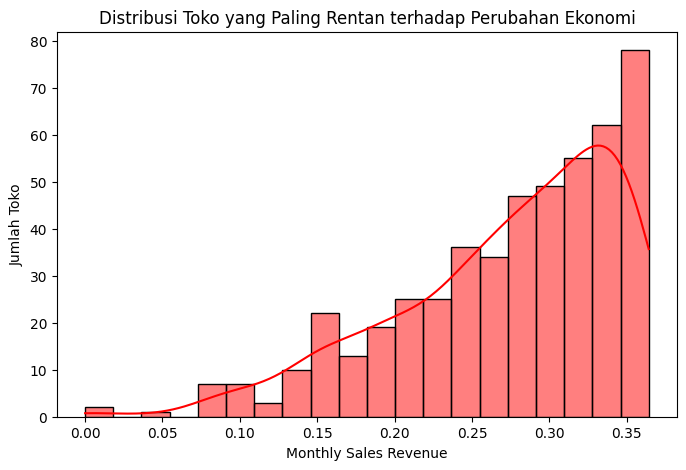

In [ ]:
# Visualisasi Data Toko yang Paling Rentan
plt.figure(figsize=(8,5))
sns.histplot(df_vulnerable["MonthlySalesRevenue"], bins=20, kde=True, color='red')
plt.xlabel("Monthly Sales Revenue")
plt.ylabel("Jumlah Toko")
plt.title("Distribusi Toko yang Paling Rentan terhadap Perubahan Ekonomi")
plt.show()

- Grafik menunjukkan distribusi normal yang miring ke kanan
- Puncak distribusi berada pada Monthly Sales Revenue sekitar 0.30-0.35
- Mayoritas toko rentan berada pada rentang pendapatan menengah
- Terdapat lebih sedikit toko dengan pendapatan sangat rendah atau sangat tinggi

In [ ]:
# Menyusun analisis kerentanannya berdasarkan klaster
kerentanan = df.groupby(['StoreLocation', 'StoreCategory', 'Cluster']).size().reset_index(name='Jumlah Toko')

# Menentukan tingkat kerentanannya
kerentanan['Keterangan'] = kerentanan['Cluster'].apply(lambda x: 'Rendah' if x == 0 else ('Baik' if x == 1 else 'Stabil'))

# Menampilkan hasil analisis
kerentanan

,StoreLocation,StoreCategory,Cluster,Jumlah Toko,Keterangan
0,0,0,0,47,Rendah
1,0,0,1,45,Baik
2,0,0,2,36,Stabil
3,0,1,0,41,Rendah
4,0,1,1,53,Baik
5,0,1,2,45,Stabil
6,0,2,0,51,Rendah
7,0,2,1,50,Baik
8,0,2,2,49,Stabil
9,1,0,0,39,Rendah


In [ ]:
# Menyusun analisis kerentanannya berdasarkan klaster
kerentanan1 = df.groupby(['StoreLocation', 'StoreCategory', 'Cluster']).size().reset_index(name='Jumlah Toko')

# Menentukan tingkat kerentanannya
kerentanan1['Keterangan'] = kerentanan1['Cluster'].apply(lambda x: 'Rendah' if x == 0 else ('Baik' if x == 1 else 'Stabil'))

# Pemetaan StoreLocation dan StoreCategory ke nama asli
store_location_mapping = {0: 'Los Angeles', 1: 'Palo Alto', 2: 'Sacramento'}
store_category_mapping = {0: 'Clothing', 1: 'Electronics', 2: 'Grocery'}

# Mengganti nilai pada StoreLocation dan StoreCategory dengan nama
df['StoreLocation'] = df['StoreLocation'].map(store_location_mapping)
df['StoreCategory'] = df['StoreCategory'].map(store_category_mapping)

# Menampilkan hasil
kerentanan1


,StoreLocation,StoreCategory,Cluster,Jumlah Toko,Keterangan
0,Los Angeles,Clothing,0,47,Rendah
1,Los Angeles,Clothing,1,45,Baik
2,Los Angeles,Clothing,2,36,Stabil
3,Los Angeles,Electronics,0,41,Rendah
4,Los Angeles,Electronics,1,53,Baik
5,Los Angeles,Electronics,2,45,Stabil
6,Los Angeles,Grocery,0,51,Rendah
7,Los Angeles,Grocery,1,50,Baik
8,Los Angeles,Grocery,2,49,Stabil
9,Palo Alto,Clothing,0,39,Rendah


from matplotlib import pyplot as plt
_df_0['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Jumlah Toko'].plot(kind='hist', bins=20, title='Jumlah Toko')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('StoreLocation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('StoreCategory').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Keterangan').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Cluster', y='Jumlah Toko', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Jumlah Toko'].plot(kind='line', figsize=(8, 4), title='Jumlah Toko')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['StoreCategory'].value_counts()
    for x_label, grp in _df_8.groupby('StoreLocation')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('StoreLocation')
_ = plt.ylabel('StoreCategory')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Keterangan'].value_counts()
    for x_label, grp in _df_9.groupby('StoreCategory')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('StoreCategory')
_ = plt.ylabel('Keterangan')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['StoreLocation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Cluster', y='StoreLocation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['StoreCategory'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Cluster', y='StoreCategory', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Keterangan'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Cluster', y='Keterangan', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['StoreLocation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Jumlah Toko', y='StoreLocation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

- Los Angeles memiliki distribusi toko yang lebih merata antar cluster
- Kategori Clothing cenderung memiliki lebih banyak toko di cluster rendah
- Sacramento menunjukkan proporsi toko rentan yang lebih tinggi
- Electronics memiliki variasi cluster yang lebih seimbang

---
# **Kesimpulan Utama**

1. **EDA**
- Pendapatan: Grocery paling stabil, Clothing memiliki potensi tertinggi tetapi lebih berisiko, sementara Electronics cenderung stabil dengan pertumbuhan terbatas.
- Marketing: Tidak ada korelasi kuat dengan pendapatan. Grocery lebih efisien dalam pemasaran, sementara Clothing memiliki ROI yang lebih fluktuatif.
- Usia & Ukuran Toko: Toko baru (1-5 tahun) tumbuh cepat, toko menengah & matang lebih stabil. Ukuran toko tidak terlalu berpengaruh, tetapi toko berukuran 300-500 memiliki pendapatan tertinggi.
- Lokasi & Kondisi Ekonomi: Los Angeles dan Palo Alto memiliki variasi pendapatan lebih tinggi. Electronics paling sensitif terhadap kondisi ekonomi, - Grocery paling stabil, dan Clothing mengikuti pola musiman.
- Persaingan & Promosi: Electronics optimal dengan jarak pesaing 0.4-0.6, Clothing paling sensitif terhadap persaingan. Promosi paling efektif untuk Grocery (6x per periode), Clothing (7-8x), dan Electronics (5-6x).
- Kesimpulan:
  - Electronics: Sensitif terhadap ekonomi, butuh strategi pemasaran & persaingan yang adaptif.
  - Grocery: Stabil & tahan terhadap fluktuasi, cocok untuk investasi jangka panjang.
  - Clothing: Dipengaruhi musiman & persaingan, membutuhkan strategi promosi fleksibel.
2. **Clustering KMeans**
- Clustering Analysis (K-Means) = Metode Elbow menunjukkan jumlah cluster optimal 3 atau 4 berdasarkan titik siku pada grafik WCSS. Ini mencerminkan keseimbangan antara jumlah cluster dan variasi dalam cluster, di mana penambahan cluster lebih dari itu tidak mengurangi WCSS secara signifikan.
- K-Means Clustering  
  - Cluster 0 (ekonomi rendah) memiliki pendapatan bervariasi dengan toko di area ekonomi lemah namun beberapa menghasilkan pendapatan tinggi.  
  - Cluster 1 (ekonomi tinggi) berisi toko dengan pendapatan stabil di wilayah ekonomi lebih baik.  
  - Cluster 2 (ekonomi menengah) mewakili toko di area transisi ekonomi dengan pendapatan bervariasi. Faktor utama yang mempengaruhi pendapatan adalah **ProductVariety** dan **StoreSize**, sementara lokasi, usia toko, dan efisiensi karyawan kurang berpengaruh.
- Advanced Analysis of Clusters
  - Cluster 0 membutuhkan strategi pemasaran dan diferensiasi produk lebih agresif.  
  - Cluster 1 memiliki potensi peningkatan dengan strategi pemasaran yang lebih efektif.  
  - Cluster 2 membutuhkan strategi promosi yang lebih optimal untuk bersaing.
- Interpretation of Results = Model regresi yang digunakan menunjukkan koefisien rendah (0.0412) dan R² negatif (-0.0034), yang mengindikasikan model tidak memiliki hubungan kuat dengan pendapatan. Diperlukan perbaikan model atau penambahan variabel untuk meningkatkan akurasi prediksi pendapatan.
3. **Rekomendasi**
- **Electronics**:  
   - Adaptasi pemasaran dan strategi persaingan terhadap kondisi ekonomi.  
   - Fokus pada promosi efisien dan penyesuaian berdasarkan kondisi pasar.
- **Grocery**:  
   - Pertahankan kestabilan produk dan pelayanan.  
   - Implementasikan promosi yang konsisten dan efisien untuk meningkatkan pendapatan.
- **Clothing**:  
   - Sesuaikan strategi pemasaran dengan tren musiman dan tingkat persaingan.  
   - Tingkatkan frekuensi promosi agar lebih fleksibel dan menarik.
- **Cluster 0 (Ekonomi Rendah)**:  
   - Gunakan strategi pemasaran agresif dan diferensiasi produk.  
   - Fokus pada inovasi produk dan efisiensi biaya.
- **Cluster 1 (Ekonomi Tinggi)**:  
   - Optimalkan strategi pemasaran untuk meningkatkan pertumbuhan.  
   - Gunakan pemasaran berbasis data dan penargetan yang tepat.
- **Cluster 2 (Ekonomi Menengah)**:  
   - Perbaiki promosi dan tingkatkan efisiensi operasional.  
   - Fokus pada penawaran produk yang relevan.
- **Peningkatan Model Prediksi**:  
   - Tambahkan variabel baru atau gunakan model lebih kompleks untuk akurasi prediksi pendapatan.
- **Optimalisasi Pemasaran**:  
   - Evaluasi dan sesuaikan frekuensi promosi untuk setiap segmen pasar.